# 42-train-Sept
> train model for guessing Sep 2018

## Model trained on 2015-17~2018-06

In [1]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
import os

In [2]:
seed = 114514
test_size = 0.25

In [3]:
files = ['2015_18_06.csv',
 '2015_18_04.csv',
 '2015_17.csv',
 '2015_18_02.csv']

In [4]:
data = pd.concat([pd.read_csv("/data/p_dsi/teams2022/team_1/fe_data/" + x) for x in files]).fillna(-1)

In [5]:
data

,indiv_id,total_transaction,sales_total,tire_purchases,service_purchases,other_purchases,days_since_first_transaction,days_since_last_transaction,days_since_first_tire_purchase,days_since_last_tire_purchase,vehicle_count,model_year_avg,store,tire_purchase_freq,response
0,251634506.0,15,1098.36,3,12,0,1110,148,1110.0,656.0,6,2012.133333,25941,0.002703,0
1,251634507.0,31,3015.12,4,26,1,1147,12,1145.0,459.0,6,2007.677419,551007,0.003487,0
2,251634508.0,4,490.34,2,2,0,1031,102,1031.0,102.0,2,2006.500000,20397,0.001940,0
3,251634512.0,1,0.00,0,1,0,909,909,-1.0,-1.0,1,2003.000000,4561,0.000000,0
4,251634532.0,4,148.38,0,4,0,1121,1044,-1.0,-1.0,3,2002.750000,118869,0.000000,0
5,251634533.0,19,729.41,2,17,0,1126,25,1006.0,702.0,1,2005.000000,768287,0.001776,0
6,251634548.0,13,546.35,1,12,0,1138,193,977.0,977.0,4,2013.538462,650102,0.000879,0
7,251634551.0,9,377.68,0,9,0,1012,57,-1.0,-1.0,2,2005.444444,248,0.000000,0
8,251634561.0,5,141.15,0,5,0,1135,728,-1.0,-1.0,2,2012.600000,533394,0.000000,0
9,251634608.0,4,545.47,0,4,0,981,840,-1.0,-1.0,1,2007.000000,320278,0.000000,0


In [6]:
data.groupby('response').count()

,indiv_id,total_transaction,sales_total,tire_purchases,service_purchases,other_purchases,days_since_first_transaction,days_since_last_transaction,days_since_first_tire_purchase,days_since_last_tire_purchase,vehicle_count,model_year_avg,store,tire_purchase_freq
response,,,,,,,,,,,,,,
0,21079102,21079102,21079102,21079102,21079102,21079102,21079102,21079102,21079102,21079102,21079102,21079102,21079102,21079102
1,421821,421821,421821,421821,421821,421821,421821,421821,421821,421821,421821,421821,421821,421821


In [7]:
X = data.drop('response',axis=1)
Y = data['response']

In [8]:
X_train_old, X_test_old, Y_train, Y_test = train_test_split(X, Y, test_size = test_size, random_state = seed)

## Overrepresent purchase to two times with bagging, and underrepresent no-purchase to the same size as "two times of purchase"

In [9]:
train = pd.concat([X_train_old, Y_train], axis=1)
length = 2*len(train[train['response']==1])
buy = train[train['response']==1].sample(n=length, replace=True, random_state = seed)
nobuy = train[train['response']==0].sample(n=length, replace=True, random_state = seed)
new_train = pd.concat([buy,nobuy])
X_train = new_train.drop(['indiv_id','response'], axis=1)
Y_train = new_train['response']
X_test = X_test_old.drop('indiv_id', axis = 1)

## XGBoost Classifier. XGBClassifier is a sklearn style object

In [10]:
model = XGBClassifier()
eval_set = [(X_test, Y_test)]
model.fit(X_train, Y_train, early_stopping_rounds = 10, eval_metric = 'error', eval_set = eval_set, verbose=True)

/home/lins19/.local/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-error:0.33074
[1]	validation_0-error:0.33760
[2]	validation_0-error:0.34168
[3]	validation_0-error:0.34278
[4]	validation_0-error:0.34947
[5]	validation_0-error:0.34896
[6]	validation_0-error:0.34751
[7]	validation_0-error:0.34535
[8]	validation_0-error:0.34660
[9]	validation_0-error:0.34508


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
       gamma=0, gpu_id=-1, importance_type=None,
       interaction_constraints='', learning_rate=0.300000012,
       max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
       monotone_constraints='()', n_estimators=100, n_jobs=8,
       num_parallel_tree=1, objective='binary:logistic', predictor='auto',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       subsample=1, tree_method='exact', use_label_encoder=True,
       validate_parameters=1, verbosity=None)

In [11]:
Y_prob = pd.DataFrame(model.predict_proba(X_test), columns = ['pred_0', 'pred_1'])
Y_pred = model.predict(X_test)

In [12]:
accuracy_score(Y_test, Y_pred)

0.66926519064948098

In [13]:
f1_score(Y_test, Y_pred)

0.075168420669312841

In [14]:
# Recall matters the most
recall_score(Y_test, Y_pred)

0.68835512024086287

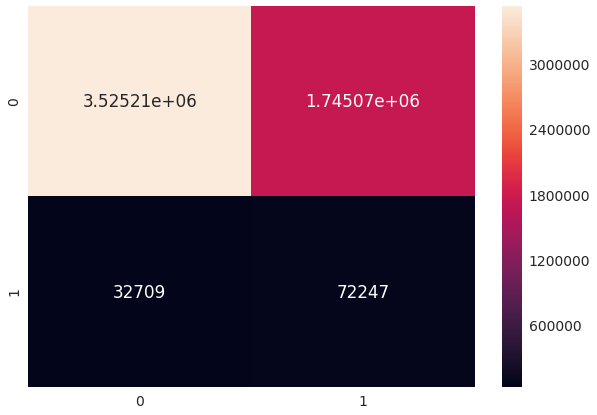

In [15]:
cm = confusion_matrix(Y_test, Y_pred)
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt = "g")
plt.show()

In [16]:
cm

array([[3525208, 1745067],
       [  32709,   72247]])

In [17]:
np.sum(Y_test)

104956

## Predict on Aug 2018 and check with Sept 2019

In [18]:
Real_X = pd.read_csv("/data/p_dsi/teams2022/team_1/fe_data/2015_18_08.csv")

In [20]:
Real_X.head()

,indiv_id,total_transaction,sales_total,tire_purchases,service_purchases,other_purchases,days_since_first_transaction,days_since_last_transaction,days_since_first_tire_purchase,days_since_last_tire_purchase,vehicle_count,model_year_avg,store,tire_purchase_freq,response
0,251634506.0,15,1098.36,3,12,0,1172,210,1172.0,718.0,6,2012.133333,25941,0.002560,0
1,251634507.0,31,3015.12,4,26,1,1209,74,1207.0,521.0,6,2007.677419,551007,0.003309,0
2,251634508.0,4,490.34,2,2,0,1093,164,1093.0,164.0,2,2006.500000,20397,0.001830,0
3,251634512.0,1,0.00,0,1,0,971,971,-1.0,-1.0,1,2003.000000,4561,0.000000,0
4,251634532.0,4,148.38,0,4,0,1183,1106,-1.0,-1.0,3,2002.750000,118869,0.000000,0


In [21]:
Real_Y_prob = pd.DataFrame(model.predict_proba(Real_X.drop(['indiv_id', 'response'], axis=1)), columns = ['pred_0', 'pred_1'])

In [25]:
top100k_id = pd.concat([Real_X, Real_Y_prob], axis=1).sort_values('pred_1', ascending=False)['indiv_id'].unique()[0:100000]

In [30]:
Real_Y = pd.read_csv("/data/p_dsi/teams2022/team_1/new_data/20180930.csv")

In [31]:
Real_Y_id = Real_Y[Real_Y['prod_group_code']==5]['indiv_id'].unique()

In [34]:
index = len([x for x in top100k_id if x in Real_Y_id])/100000

In [35]:
index

0.10758